In [4]:
from typing import List

import cv2
from pytube import YouTube


class SheetExtractor:
    def __init__(self, url, interval: int = 3):
        yt = YouTube(url)
        self.filename = yt.streams.filter(progressive=True, file_extension='mp4').order_by(
            'resolution').desc().first().download()

        self.interval = interval


    def extract(self, filename=None, limit: int = None) -> List[str]:
        if not filename: 
            filename = self.filename

        file = cv2.VideoCapture(filename)
        fps = round(file.get(cv2.CAP_PROP_FPS))
        output_filenames = []
        
        idx = 0
        frame_count = 0
        while True:
            # Capture frame-by-frame
            ret, frame = file.read()
            
            # if frame is read correctly ret is True
            if not ret:
                # might need log
                break

            # fetch frame by pre-defined interval
            frame_count += 1
            if frame_count % (fps * self.interval):
                continue

            # save selected image
            output_filename = f'temp_{idx}.png'
            cv2.imwrite(output_filename, frame)
            output_filenames.append(output_filename)
            idx += 1
            if limit and idx > limit:
                break
        file.release()
        return output_filenames


In [115]:
url = "https://www.youtube.com/watch?v=OBF4kZS9baw"
yt = YouTube(url)

In [5]:
sheet = SheetExtractor("https://www.youtube.com/watch?v=HI-NTsegFVk")

In [6]:
sheet.extract(limit=5)

['temp_0.png',
 'temp_1.png',
 'temp_2.png',
 'temp_3.png',
 'temp_4.png',
 'temp_5.png']

In [12]:
from PIL import Image
import pytesseract

In [101]:
img = Image.open('temp_2.png')
text = pytesseract.image_to_string(img, lang='eng')
print(text)

In [42]:
from tempfile import TemporaryDirectory

In [44]:
with TemporaryDirectory() as dir_name:


/var/folders/hp/w0bd52xs4qv1pwgptwcmlwvr0000gn/T/tmp45ic9uwr
/var/folders/hp/w0bd52xs4qv1pwgptwcmlwvr0000gn/T/tmp45ic9uwr


In [7]:
import os
import shutil

In [48]:
shutil.rmtree('test')

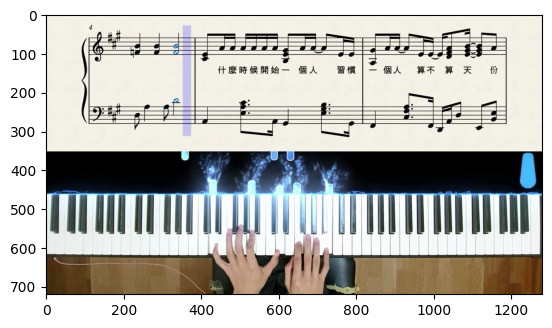

In [10]:
img = cv2.imread('temp_5.png')
show_image(img)

In [8]:
import matplotlib.pyplot as plt

In [9]:
def show_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

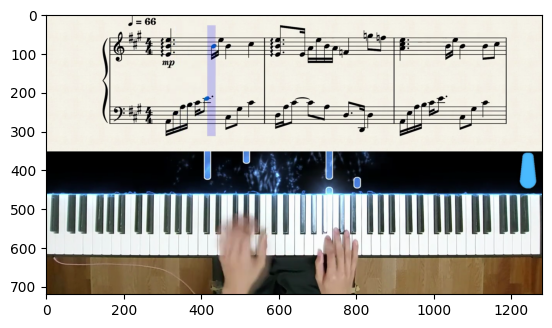

In [63]:
# plt.imshow(cv2.cvtColor(image_add, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

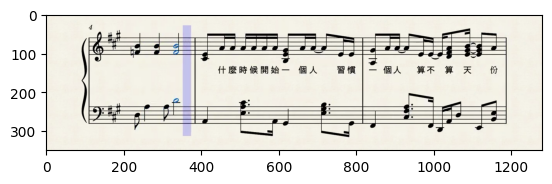

In [21]:
# 裁切區域的 x 與 y 座標（左上角）
x = 0
y = 0

# 裁切區域的長度與寬度
w = 1280
h = 350

# 裁切圖片
crop_img = img[y:y+h, x:x+w]
show_image(crop_img)

In [74]:
crop_img.shape

350

In [75]:
height, width, _ = crop_img.shape

In [19]:
img_1 = crop_img

In [22]:
img_2 = crop_img

In [ ]:
images = [img_1, img_2]

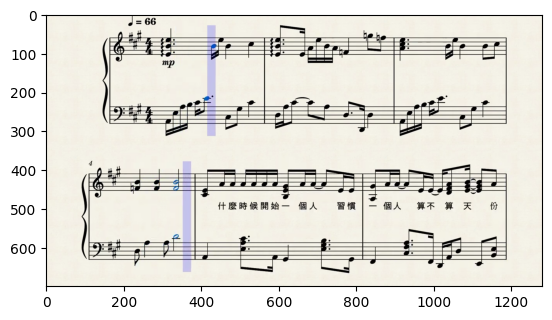

In [28]:
show_image(cv2.vconcat([img_1, img_2]))

In [88]:
def a_hash(img):
    s = 0
    hash_str = ''
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for i in range(height):
        for j in range(width):
            s += gray[i, j]
    avg = s / (height * width)

    for i in range(height):
        for j in range(width):
            hash_str += '1' if gray[i, j] > avg else '0'
    return hash_str

In [90]:
hash_1 = a_hash(crop_img)

In [93]:
hash_2 = a_hash(crop_img)

In [104]:
hash_3 = a_hash(crop_img)

In [94]:
hash_1 == hash_2

False

In [98]:
def cmp_hash(hash_1, hash_2):
    n = 0
    if len(hash_1) != len(hash_2):
        raise Exception('Length of hash_1 and hash_2 are not the same.')
    
    for i, _ in enumerate(hash_1):
        if hash_1[i] != hash_2[i]:
            n += 1
    return n

In [105]:
cmp_hash(hash_1, hash_3) / (height * width)

0.023799107142857143

In [117]:
list(sorted(filter(lambda x: 1 if '.png' in x else 0, os.listdir('.'))))

['temp_0.png',
 'temp_1.png',
 'temp_2.png',
 'temp_3.png',
 'temp_4.png',
 'temp_5.png']

In [10]:
img.save('test.pdf', "PDF" ,resolution=100.0, save_all=True)

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [11]:
image = Image.open('temp_1.png')

In [12]:
image.save('test.pdf', 'PDF', resolution=100, save_all=True)

In [11]:
filenames = [f'temp_{i}.png' for i in range(6)]

In [13]:
images = [Image.open(filename) for filename in filenames]

In [16]:
images[0].save('test.pdf', "PDF", resolution=100, save_all=True, append_images=images[1:])

In [2]:
from fpdf import FPDF

In [17]:
img = Image.open('temp_0.png')

In [3]:
pdf = FPDF()

In [20]:
pdf.add_page()
pdf.image('temp_0.png')

In [22]:
pdf.output('test.pdf', "F")

''